In [18]:
import torch
import numpy as np
import random
from diffusers import DDPMPipeline
from src.pipelines.pipeline_ddim import DDIMPipeline

seed = 4
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

pipeline = DDIMPipeline.from_pretrained("results/fashion_mnist/diffusion/gaussian_symmetry/ddim_medium_mse/42/best_model", torch_dtype=torch.float32)
# pipeline = pipeline.to("cpu")

In [29]:
import os
import torch
import numpy as np
from PIL import Image


def make_grid(images, rows, cols):
    w, h = images[0].size
    w *= 5
    h *= 5
    grid = Image.new("RGB", size=(cols * w, rows * h))
    for i, image in enumerate(images):
        image = image.resize((w, h), Image.LANCZOS)
        grid.paste(image, box=(i % cols * w, i // cols * h))
    return grid


def evaluate(eval_batch_size, pipeline, steps: int = 50):
    # Sample some images from random noise (this is the backward diffusion process).
    # The default pipeline output type is `List[PIL.Image]`
    images = pipeline(
        batch_size=eval_batch_size,
        generator=torch.manual_seed(seed),
        num_inference_steps=steps,
        eta=0.0,
        output_type="pil",
    ).images

    # Make a grid out of the images
    image_grid = make_grid(images, rows=6, cols=8)

    # Show the image grid in the notebook
    display(image_grid)

5it [00:01,  3.27it/s]


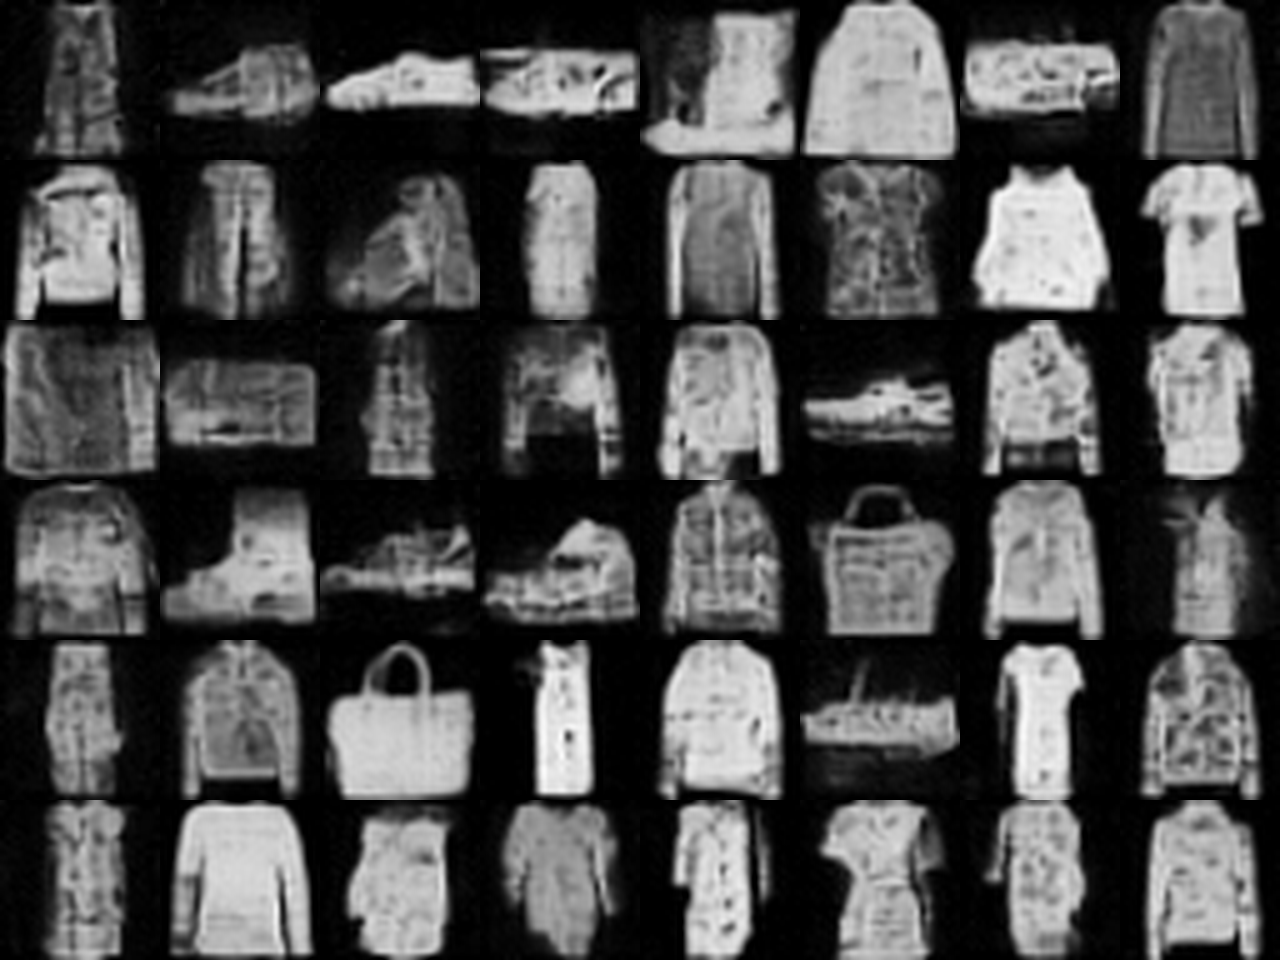

In [30]:
evaluate(48, pipeline, steps=5) 